In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt

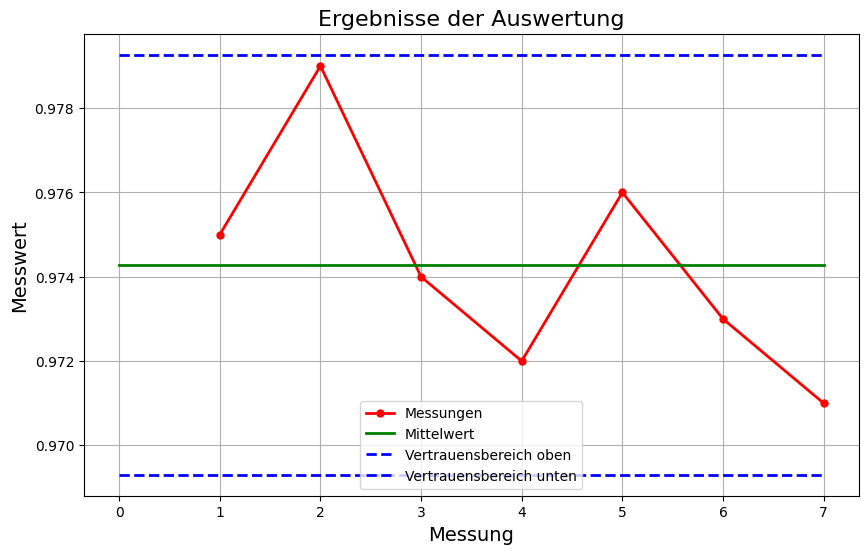

Genauigkeit des Mittelwertes (Matrix-Berechnung) = 0.001 m
Mittelwert = 0.974 m
Genauigkeit des Mittelwertes = 0.001 m


In [9]:
def berechne_statistik(messwerte):
    """Calculate mean, standard deviation, and confidence interval."""
    N = len(messwerte)
    Mittelwert = np.mean(messwerte)
    StAbw = np.std(messwerte)
    StAbw_Mittelwert = StAbw / math.sqrt(N)
    vb_o = Mittelwert + 2 * StAbw
    vb_u = Mittelwert - 2 * StAbw
    return Mittelwert, StAbw_Mittelwert, vb_o, vb_u

def plot_ergebnisse(messwerte, Mittelwert, vb_o, vb_u):
    """Visualize measurements with mean and confidence intervals."""
    N = len(messwerte)
    nummer = np.linspace(1, N, N)

    plt.figure(figsize=(10, 6))
    plt.plot(nummer, messwerte, 'ro-', label='Messungen', linewidth=2, markersize=5)
    plt.plot([0, N], [Mittelwert, Mittelwert], 'g-', label='Mittelwert', linewidth=2)
    plt.plot([0, N], [vb_o, vb_o], 'b--', label='Vertrauensbereich oben', linewidth=2)
    plt.plot([0, N], [vb_u, vb_u], 'b--', label='Vertrauensbereich unten', linewidth=2)

    plt.legend()
    plt.xlabel('Messung', fontsize=14)
    plt.ylabel('Messwert', fontsize=14)
    plt.title('Ergebnisse der Auswertung', fontsize=16)
    plt.grid(True)
    plt.savefig("grafik.jpg")
    plt.show()

def matrizen_berechnung(messwerte, gen):
    """Perform matrix calculations (optional)."""
    c = 1  # Standard deviation of the weight unit
    N = len(messwerte)
    A = np.ones([N, 1])  # Matrix A consists of ones
    P = np.diag((c / gen) ** 2)  # Diagonal matrix P

    # Calculate mean using matrices
    Norm = A.T @ P @ A
    Q = np.linalg.inv(Norm)
    HW = Q @ A.T @ P
    X = HW @ messwerte

    # Calculate accuracy of the mean
    V = messwerte - A @ X
    s0_2 = (V.T @ P @ V) / (N - 1)
    s0 = np.sqrt(s0_2)
    sX_2 = s0_2 * Q
    sX = np.sqrt(sX_2)

    mittelwert = X[0]
    stAbw = sX[0, 0]
    return mittelwert, stAbw

def manuelle_eingabe_standardabweichungen(N):
    """Input standard deviations for matrix calculation."""
    gen = []
    print(f"Gib die {N} Standardabweichungen ein. Tippe 'done', wenn du fertig bist.")
    for i in range(N):
        while True:
            try:
                wert = float(input(f"Standardabweichung für Messung {i + 1}: "))
                gen.append(wert)
                break
            except ValueError:
                print("Ungültiger Wert, bitte eine Zahl eingeben.")
    return np.array(gen)

def standardabweichung_auswahl(messwerte):
    """Select how to determine standard deviations."""
    StAbw = np.std(messwerte, ddof=1)  # Calculate standard deviation of measurements
    return np.ones(len(messwerte)) * StAbw  # Uniform standard deviation for all measurements

# Main process
with open('var17_ue3.txt', 'r') as file:
    messwerte = [float(line.strip().replace(',', '.')) for line in file]

# Calculate mean, standard deviation, and confidence interval
Mittelwert, StAbw_Mittelwert, vb_o, vb_u = berechne_statistik(messwerte)

# Plot results
plot_ergebnisse(messwerte, Mittelwert, vb_o, vb_u)

gen = standardabweichung_auswahl(messwerte)
mittelwert_matrix, stAbw_matrix = matrizen_berechnung(messwerte, gen)

# Output results
# print('Mittelwert (Matrix-Berechnung) =', np.round(mittelwert_matrix, 4), 'm')
print('Genauigkeit des Mittelwertes (Matrix-Berechnung) =', np.round(stAbw_matrix, 4), 'm')

print(f'Mittelwert = {round(Mittelwert, 3)} m')
print(f'Genauigkeit des Mittelwertes = {round(StAbw_Mittelwert, 3)} m')